In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [21]:
# Descarga de datos
# ==============================================================================

url = ('E:/María/table.csv')
datos = pd.read_csv(url, sep=',')
datos.head(4)

,time,latitude,longitude,temperature,temperature_C,DegreeDays,DegreeDays_ac,Zona
0,2022-04-10T12:00:00,1.052630,38.671875,311.56802,38,22.8,22.8,Zona A
1,2022-04-10T12:00:00,1.754383,38.671875,311.90005,21,22.8,45.6,Zona A
2,2022-04-11T12:00:00,1.052630,38.671875,311.13495,38,22.8,68.4,Zona A
3,2022-04-11T12:00:00,1.754383,38.671875,311.61150,38,22.8,91.2,Zona A


In [22]:
datos.groupby('Zona').size()


Zona
Zona A    37
Zona B    35
dtype: int64

In [23]:
#Hipótesis

#H0 : no hay diferencia entre las medias poblacionales de "temperature_C": μ(Zona A)−μ(Zona B)=0
#Ha : si hay diferencia entre las medias poblacionales de "temperature_C": μ(Zona A)−μ(Zona B)≠0 

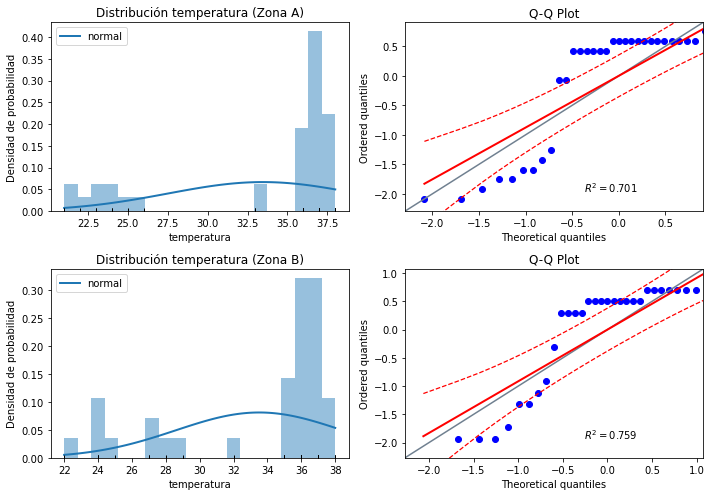

In [27]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

########## Zona A ###########

tempA = datos.loc[datos.Zona == 'Zona A', 'temperature_C']

# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(tempA)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tempA), max(tempA), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=tempA, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(tempA, np.full_like(tempA, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución temperatura (Zona A)')
axs[0, 0].set_xlabel('temperatura')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot para estudiar la normalidad de la distribución de los datos.
pg.qqplot(tempA, dist='norm', ax=axs[0, 1])

############# Zona B ################

tempB = datos.loc[datos.Zona == 'Zona B', 'temperature_C']

# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(tempB)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tempB), max(tempB), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=tempB, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(tempB, np.full_like(tempB, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución temperatura (Zona B)')
axs[1, 0].set_xlabel('temperatura')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

# Gráfico distribución qq-plot para estudiar la normalidad de la distribución de los datos.
pg.qqplot(tempB, dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [28]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos, dv='temperature_C', group='Zona')

,W,pval,normal
Zona A,0.689470,1.472840e-07,False
Zona B,0.750246,2.478399e-06,False


In [ ]:
# Los gráficos cuantil-cuantil muestran asimetría hacia la izquierda,
# y el test Shapiro-Wilk encuentran evidencias significativas de que los datos no proceden de poblaciones con distribución normal.

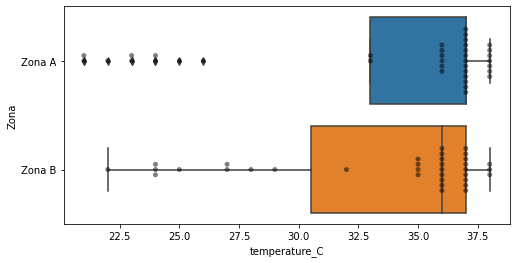

In [32]:
#Igualdad de varianza (homocedasticidad)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Zona", x="temperature_C", data=datos, ax=ax)
sns.swarmplot(y="Zona", x="temperature_C", data=datos, color='black', alpha = 0.5, ax=ax);


In [33]:
# Test de homocedasticidad

# Existen varios test que permiten comparar varianzas. 
# Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Levene
# ==============================================================================
pg.homoscedasticity(data=datos, dv='temperature_C', group='Zona')

,W,pval,equal_var
levene,0.221925,0.639042,True


In [ ]:
# No se encuentran evidencias significativas (para alpha = 0.06) de que las varianzas sean distintas entre ambas poblaciones. 
# Si lo fuesen, se tendría que realizar el t-test.